# 🐱🐶 Dogs vs Cats Image Classification Using Convolutional Neural Networks

In this notebook, we will classify images of cats and dogs using a custom Convolutional Neural Network (CNN) model. We will also evaluate the model's performance using accuracy, loss, confusion matrix, and classification report.

---

## 🔹 1. Setup Kaggle API and Download Dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:10<00:00, 97.4MB/s]
100% 1.06G/1.06G [00:10<00:00, 108MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## 🔹 2. Data Preparation
### ✅ Step 1: Load the Dataset Using ImageDataset API

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.


In [ ]:

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 5000 files belonging to 2 classes.


### ✅ Step 2: Normalize the Images

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### 🔹 3. Model Architecture
✅ Step 1: Build the CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(64, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(128, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(256, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(512, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,204,529 (16.04 MB)

 Trainable params: 4,204,529 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

### ✅ Step 2: Compile & Train the Model

In [ ]:
# Compile the model using SGD with momentum
#sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.6057 - loss: 0.6763 - val_accuracy: 0.7102 - val_loss: 0.5607
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7427 - loss: 0.5234 - val_accuracy: 0.7758 - val_loss: 0.4797
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7936 - loss: 0.4402 - val_accuracy: 0.7890 - val_loss: 0.4614
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.8361 - loss: 0.3691 - val_accuracy: 0.7916 - val_loss: 0.4848
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.8826 - loss: 0.2822 - val_accuracy: 0.7796 - val_loss: 0.5592
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9213 - loss: 0.1950 - val_accuracy: 0.7780 - val_loss: 0.6376
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - accuracy: 0.9572 - loss: 0.1130 - val_accuracy: 0.7834 - val_loss: 0.8274
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9719 - loss: 0.0791 - 

## 🔹 . Evaluate Model Performance
✅ Step 1: Plot Training and Validation Accuracy

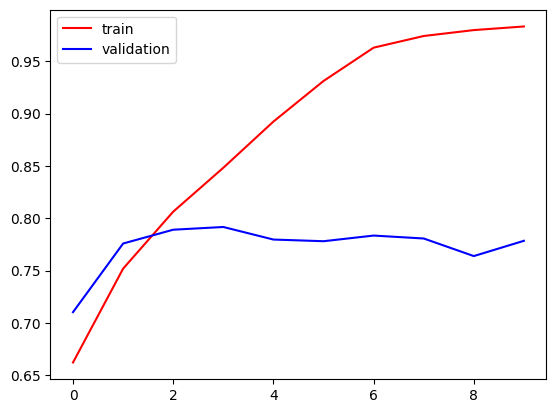

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

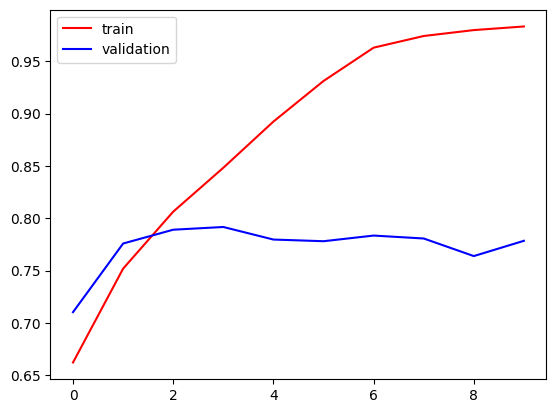

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

### ✅ Step 2: Evaluate Model on Test Data

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_ds, verbose=1)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7691 - loss: 1.3039
Test Accuracy: 77.84%
Test Loss: 1.2269


## 🔹 5. Performance Analysis
✅ Step 1: Generate True Labels

In [ ]:
true_labels = []
for _, labels in validation_ds:  # Iterate through the dataset
    true_labels.extend(labels.numpy())  # Convert tensors to numpy arrays
true_labels = np.array(true_labels)  # Convert to numpy array


### ✅ Step 2: Make Predictions

In [ ]:
preds = model.predict(validation_ds)  # Predicted probabilities
pred_labels = (preds > 0.5).astype(int).flatten()  # Convert to binary labels


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step


### ✅ Step 3: Create Confusion Matrix & Classification Report


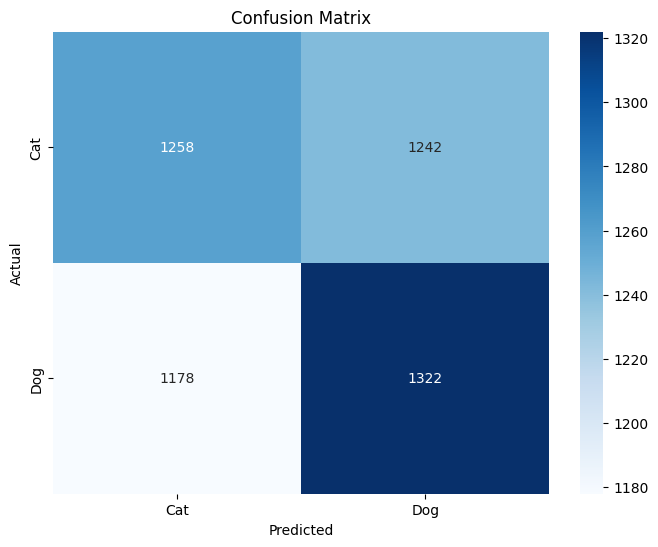

              precision    recall  f1-score   support

         Cat       0.52      0.50      0.51      2500
         Dog       0.52      0.53      0.52      2500

    accuracy                           0.52      5000
   macro avg       0.52      0.52      0.52      5000
weighted avg       0.52      0.52      0.52      5000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, pred_labels, target_names=['Cat', 'Dog']))


### 🔹 6. inference on validation data
✅ Step 1: Check Image Shape

In [ ]:
# Check the shape of images and labels in the validation dataset
for images, labels in validation_ds.take(1):
    print("Images Shape:", images.shape)  # Expected: (batch_size, 256, 256, 3)
    print("Labels Shape:", labels.shape)  # Expected: (batch_size,)
    print("Labels Example:", labels.numpy())  # Should print 0s and 1s


Images Shape: (32, 256, 256, 3)
Labels Shape: (32,)
Labels Example: [0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1]


### ✅ Step 2: Make Predictions


In [ ]:
# Make predictions on the validation dataset
preds = model.predict(validation_ds)

# Since the model should output probabilities for binary classification (2 classes)
# Convert predictions to binary labels (0 or 1)
pred_labels = (preds > 0.5).astype(int).flatten()

print("Predicted Labels:", pred_labels[:10])  # Check the first 10 predictions


157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step
Predicted Labels: [1 1 0 1 1 1 1 1 0 1]


In [ ]:
true_labels = []
for _, labels in validation_ds:
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)  # Convert to numpy array
print("True Labels:", true_labels[:10])  # Check the first 10 true labels


True Labels: [1 1 1 1 1 0 1 1 1 1]


### ### ✅ Step 3: Create Confusion Matrix & Classification Report


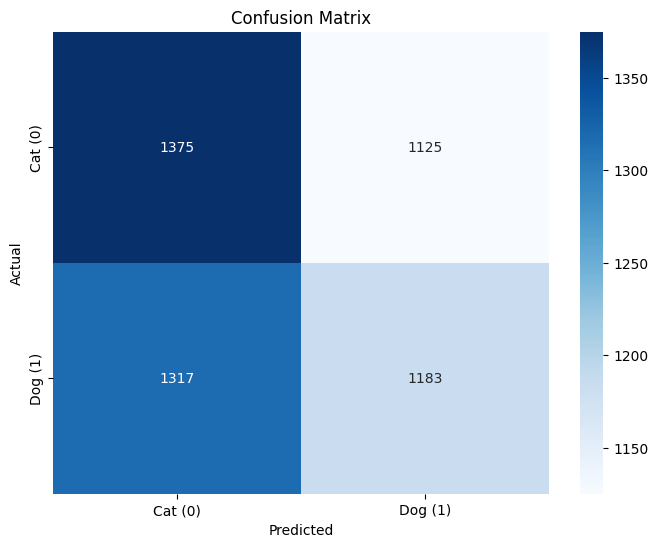

              precision    recall  f1-score   support

         Cat       0.51      0.55      0.53      2500
         Dog       0.51      0.47      0.49      2500

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat (0)', 'Dog (1)'], yticklabels=['Cat (0)', 'Dog (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, pred_labels, target_names=['Cat', 'Dog']))


## 🔹 Conclusion
The model has been trained to classify Cats vs Dogs. We evaluated the model's performance using accuracy, confusion matrix, and classification report.

The Confusion Matrix helps us understand how well the model is distinguishing between the two classes, and the Classification Report provides key performance metrics such as precision, recall, and F1-score.

---------------